In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math

In [ ]:
def leer (doc):
  data = pd.read_csv(doc)
  inc = data['Incidente (gr)'].to_numpy()*2*np.pi/360
  t = data['transmitido (gr)'].to_numpy()*2*np.pi/360
  i_err = data['e_incid (gr)'].to_numpy()*2*np.pi/360
  t_err = data['e_trans (gr)'].to_numpy()*2*np.pi/360
  return inc,t,i_err,t_err

def lineal(x, a, b):
  return a*x+ b

def snell(w, n):
  asin = []
  for j in range(len(w)):
    asin.append(math.asin(np.sin(w[j])/n))
  return asin

In [ ]:
lista = [
"https://docs.google.com/spreadsheets/d/e/2PACX-1vTT1dEq7yvvv8cDka9hS6Nd4bRjUg8ptNva1dC16LTniziXno6WTeuUL6gSPl9YQcy-qKYWtOX1ZdR5/pub?gid=0&single=true&output=csv",
"https://docs.google.com/spreadsheets/d/e/2PACX-1vTK1pCMw5Yko1Kt9uBv4FslD5U4TrTQEGHqbB00bsCKJL6OsQMAh40vdIPitMW_MaifcxdPWS7TY7AJ/pub?gid=0&single=true&output=csv",
"https://docs.google.com/spreadsheets/d/e/2PACX-1vSFxfviSPuldxr8mHecUKmrtknkH94INGSdPeUFHgcaj1ogViJ7XpCPARppYyWwP9yLqCNWE-JuTomH/pub?gid=0&single=true&output=csv",
"https://docs.google.com/spreadsheets/d/e/2PACX-1vQiwtFopuhpAgbscD_3QtOZZyuELMkD-xhsg7jtXsxU7VnYulwd45Sq9sDSceKH8BiJNzy9rC8k5u2M/pub?gid=0&single=true&output=csv",
"https://docs.google.com/spreadsheets/d/e/2PACX-1vTOTjExqYvb7KlIJLkDDA4LNuK9M8Tj_3cNLyo_YpvxsSKtbK2KeFlHdsPAxBmveqY9KAwBnFqmZn_2/pub?gid=0&single=true&output=csv",
"https://docs.google.com/spreadsheets/d/e/2PACX-1vQPMCOxk3RMKQw2jhly41Xa4VOodX-HIK_PoaUXplNWE5R-G1t8UcD1WgdVRFcKCGAvLwgLyy9qJyvJ/pub?gid=0&single=true&output=csv"]

In [ ]:
##DATOS PARA AJUSTES NO LINEALES

#leer datos
listainc = []
listayfit = []
listat = []
listate = []

for i in range(len(lista)):
  inc, t, i_err, t_err = leer(lista[i])
  p, cov = scipy.optimize.curve_fit(snell, inc, t, sigma=t_err, absolute_sigma=True)
  err = np.sqrt(np.diag(cov))
  y_fit = snell(inc, p[0])
  listainc.append(inc)
  listat.append(t)
  listate.append(t_err)
  listayfit.append(y_fit)

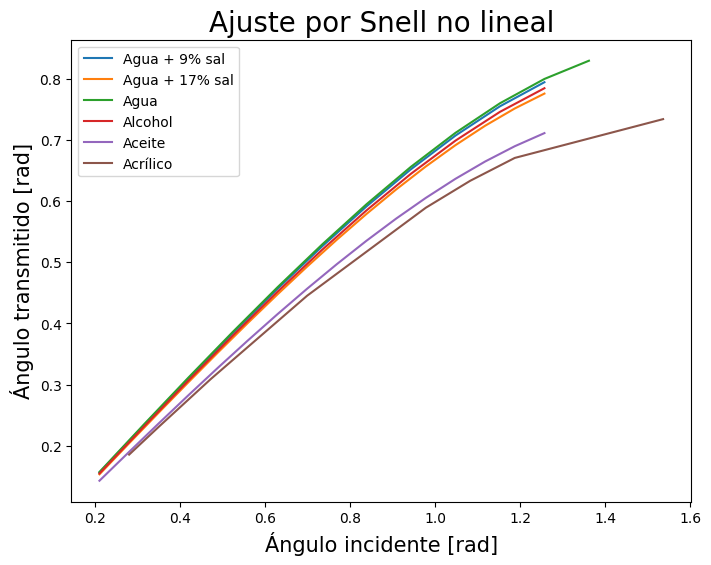

In [ ]:
names= ["Agua + 9% sal", "Agua + 17% sal","Agua","Alcohol","Aceite", "Acrílico"]

plt.figure(figsize=(8,6))
for i in range(len(lista)):
  plt.plot(listainc[i], listayfit[i], "-", label = f"{names[i]}")
  plt.xlabel("Ángulo incidente [rad]", fontsize=15)
  plt.ylabel("Ángulo transmitido [rad]", fontsize=15)
  plt.grid(), plt.legend()
  plt.title("Ajuste por Snell no lineal", fontsize=20)

In [ ]:
#DATOS PARA AJUSTES LINEALES

#leer datos
listayfit = []
listasi = []
listast = []
listaste = []

for i in range(len(lista)):
  inc, t, i_err, t_err = leer(lista[i])
  sen_i = np.sin(inc)
  sen_t = np.sin(t)
  sen_t_err = np.cos(t)*t_err
  p, cov = scipy.optimize.curve_fit(lineal, sen_i, sen_t)
  err = np.sqrt(np.diag(cov))
  y_fit = lineal(sen_i, p[0], p[1])
  listayfit.append(y_fit)
  listasi.append(sen_i)
  listast.append(sen_t)
  listaste.append(sen_t_err)

In [ ]:
#GRAFICO DE AJUSTES LINEALES
names= ["Agua + 9% sal", "Agua + 17% sal","Agua","Alcohol","Aceite", "Acrílico"]

plt.figure(figsize=(9,4))
for i in range(len(lista)):
#  plt.errorbar(listasi[i], listast[i], yerr=listaste[i], fmt=".", label="Datos")
  plt.plot(listasi[i], listayfit[i], "-", label = f"{names[i]}")
  plt.xlabel("Sen(ángulo incidente)", fontsize=15)
  plt.ylabel("Sen(ángulo transmitido)", fontsize=15)
  plt.grid(), plt.legend()
  plt.title("Ajustes lineales", fontsize=20)

In [ ]:
plt.figure()
plt.errorbar(1, )